In [ ]:
!pip install sklearn
!pip install pandas
!pip install tweepy
!pip install spotipy
!pip install distance
!pip install sklearn
#Installing the reuqired libraires

In [157]:
import pandas as pd
import time
import numpy as np


In [33]:
df_cd=pd.read_csv("shows.csv") ## Reading the Modified 100k Podcast Data set

In [34]:
df_cd=df_cd.drop(columns="Unnamed: 0")

In [35]:
df_cd

,show_name,show_description,publisher
0,,Cheever Plastic Plastic,Tadeo
1,The Grier Podcast,A podcast recorded and created by the students...,Bryan Beckel
2,"""ACIM"" A Course In Miracles For The Millennium","""A study group for the transformation of life ...",Rafael Hidalgo
3,AfroLatina_BeautifitlyBalanced™️,Health+SELF Love+Spotless Clean Home! That’s e...,The AfroLatina_BeautifitlyBalanced™️
4,Apostles of Tomorrow,"A podcast to help fellow Gen Z Apostolic’s,To ...",Your host Garrett
...,...,...,...
18285,🖤The Best Comes from the worst 🖤,In order to live your best life you must exper...,James Taylor
18286,🗣RED CUP VIBEz,Sipping too many adult beverages out of a red ...,BURBERRYLYTE
18287,😀😀😀 PositiveVibes 24/7 😀😀😀,PositiveVibes Only I Am Who I've Been Looking ...,PositiveVibes
18288,😍😍🤩,Kiley and elisabeths adventures 😀 😀,Elisabeth Baxter-Burris


In [36]:
import tweepy

auth = tweepy.OAuth2BearerHandler("AAAAAAAAAAAAAAAAAAAAAGkueAEAAAAAVYPTskvosl3Fvb%2FQ7gMMJ%2FYS1%2BA%3D4V6pAaGq9dHyqdNA5leWuSCgsMgw5FOUwofyCfs6bIswEvNNBs")
api = tweepy.API(auth) ## Calling the twitter api with authtoken

In [37]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


cid ='4a8f691d58c34c059a235249fa877f6e' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = '9b9a8e97d24c4688abb5f188a2d80de3' # Client Secret; copy this from your app
username = '31obxjrwpdtksnjtof7oopbelnwq' # 
#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='http://localhost:3000/callback'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)
    
##Getting Spotify auth token

In [38]:
current_user=sp.current_user()
#Getting user details

In [39]:
country_code=current_user["country"]

In [40]:
woeids=pd.read_csv("woeid.csv")

In [41]:
woeid_for_current_user=woeids[woeids["area"]==country_code]["woeid"]

In [42]:
woeid_current_user=woeid_for_current_user.values[0]

In [43]:
woeid_current_user ## Getting woeid of the user to get the user locations woeid

23424975

In [44]:
trends=api.get_place_trends(woeid_current_user)[0]["trends"] # Getting the trending topics of the current location of the user

In [45]:
trends

[{'name': '#LEIMUN',
  'url': 'http://twitter.com/search?q=%23LEIMUN',
  'promoted_content': None,
  'query': '%23LEIMUN',
  'tweet_volume': 32554},
 {'name': 'Zakaria',
  'url': 'http://twitter.com/search?q=Zakaria',
  'promoted_content': None,
  'query': 'Zakaria',
  'tweet_volume': 46686},
 {'name': '#kettle',
  'url': 'http://twitter.com/search?q=%23kettle',
  'promoted_content': None,
  'query': '%23kettle',
  'tweet_volume': None},
 {'name': '#lufc',
  'url': 'http://twitter.com/search?q=%23lufc',
  'promoted_content': None,
  'query': '%23lufc',
  'tweet_volume': 16057},
 {'name': '#DeadlineDay',
  'url': 'http://twitter.com/search?q=%23DeadlineDay',
  'promoted_content': None,
  'query': '%23DeadlineDay',
  'tweet_volume': 301864},
 {'name': 'Gilmour',
  'url': 'http://twitter.com/search?q=Gilmour',
  'promoted_content': None,
  'query': 'Gilmour',
  'tweet_volume': 27169},
 {'name': 'Brendan Rodgers',
  'url': 'http://twitter.com/search?q=%22Brendan+Rodgers%22',
  'promoted_co

In [46]:
trends_str=""
for i in trends:
    trends_str= trends_str+" "+i["name"].replace("#","")

In [47]:
trends_str

' LEIMUN Zakaria kettle lufc DeadlineDay Gilmour Brendan Rodgers BorisJohnson Dieng Nottingham Forest Batshuayi Radz Halo Lenny Dan James Spend £20 Berge Surridge Russell Hobbs Argos Melissa Reddy Dempsey Robbie Savage Depay Sander Willian Ampadu Martin Kelly Brugge Ashby Luiz Ndidi Dan Evans Sizewell C Tielemans Martin Dubravka Juve Pinhead Gladbach Orta Save £10 Matty Longstaff Olympiacos Marcelo Roofe Auba Eton Camara Sky Sports News Mayweather'

In [48]:
new_row={"show_name": "twitter_trends","show_description":trends_str,"publisher":"twitter"}

In [49]:
new_row

{'show_name': 'twitter_trends',
 'show_description': ' LEIMUN Zakaria kettle lufc DeadlineDay Gilmour Brendan Rodgers BorisJohnson Dieng Nottingham Forest Batshuayi Radz Halo Lenny Dan James Spend £20 Berge Surridge Russell Hobbs Argos Melissa Reddy Dempsey Robbie Savage Depay Sander Willian Ampadu Martin Kelly Brugge Ashby Luiz Ndidi Dan Evans Sizewell C Tielemans Martin Dubravka Juve Pinhead Gladbach Orta Save £10 Matty Longstaff Olympiacos Marcelo Roofe Auba Eton Camara Sky Sports News Mayweather',
 'publisher': 'twitter'}

In [50]:
df_cd=df_cd.append(new_row, ignore_index=True) #Appening twitter trends to the main data frame as a show

In [51]:
df_cd 

,show_name,show_description,publisher
0,,Cheever Plastic Plastic,Tadeo
1,The Grier Podcast,A podcast recorded and created by the students...,Bryan Beckel
2,"""ACIM"" A Course In Miracles For The Millennium","""A study group for the transformation of life ...",Rafael Hidalgo
3,AfroLatina_BeautifitlyBalanced™️,Health+SELF Love+Spotless Clean Home! That’s e...,The AfroLatina_BeautifitlyBalanced™️
4,Apostles of Tomorrow,"A podcast to help fellow Gen Z Apostolic’s,To ...",Your host Garrett
...,...,...,...
18286,🗣RED CUP VIBEz,Sipping too many adult beverages out of a red ...,BURBERRYLYTE
18287,😀😀😀 PositiveVibes 24/7 😀😀😀,PositiveVibes Only I Am Who I've Been Looking ...,PositiveVibes
18288,😍😍🤩,Kiley and elisabeths adventures 😀 😀,Elisabeth Baxter-Burris
18289,🚭 Quit Smoking With Me : A 30-Day Interactive ...,"You don't have to quit smoking alone, we have ...",Quit Rich


In [52]:
data=sp.current_user_saved_shows(limit=20, offset=0, market=None)["items"] #getting user's saved shows 

In [53]:
name=[]
description=[]
publisher=[]
uri=[]
for i in data:
    d=i["show"]
    name.append(d["name"])
    description.append(d["description"])
    publisher.append(d["publisher"])
    uri.append(d["id"])

In [54]:
df_saved_shows=pd.DataFrame() #Creating data frame for saved shows

In [55]:
df_saved_shows["show_name"]=name
df_saved_shows["description"]=description
df_saved_shows["publisher"]=publisher
df_saved_shows["id"]=uri

In [56]:
for i in range(len(df_saved_shows["id"])):
    a=sp.show_episodes(df_saved_shows["id"][i]) #Getting all the episode description of the saved shows
    for j in a["items"]:
        df_saved_shows["description"][i]= df_saved_shows["description"][i]+ " " +j["description"] 

In [57]:
df_saved_shows["show_name"]

0                                    Naked Data Science
1     Talk of the Devils - A show about Manchester U...
2                                         talkSPORT Hit
3                                   Times news briefing
4     Virus 2062 with Ali Fazal & Richa Chadha (Hind...
5                              The Big Shots- Dosa King
6     Luke's ENGLISH Podcast - Learn British English...
7                    Rajat chauhan | Comedian | Standup
8                                      The Ranveer Show
9                           Stars se Baatein with Salil
10                  Khel Crime Ka (Hindi Crime Podcast)
11                                          FPL Podcast
12                                     Is Romance Dead?
13                      Mission ISRO with Harsha Bhogle
14                                           Our Future
15                Bhaskar Bose (Hindi Thriller Podcast)
16    Always Cheating: A Fantasy Premier League Podc...
17                           Fantasy Weekly FPL 

In [58]:
df_saved_shows["show_description"]=df_saved_shows["description"]

In [59]:
df_saved_shows=df_saved_shows.drop(columns="description")

In [60]:
df_saved_shows=df_saved_shows[["show_name","show_description","publisher"]]

In [61]:
df_cd=df_cd.append(df_saved_shows, ignore_index=True) #Appending saved show data frane to main data frame

In [62]:
df_cd['show_description'] = df_cd['show_description'].astype(str) #Changing all show description to str format
df_cd["show_name"]=df_cd["show_name"].astype(str) #Changing all show names to str format

In [63]:
import string

for i in range(len(df_cd["show_description"])):
    df_cd["show_description"][i]=df_cd["show_description"][i].translate(str.maketrans('', '', string.punctuation)) # Removing punctuations

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words="english")
start=time.time()
count_matrix = count.fit_transform(df_cd['show_description']) #Applying  count vecrtorization to Show description
end=time.time()
print(end-start)

13.655707120895386


In [68]:
cosine_sim = cosine_similarity(count_matrix, count_matrix) #Creating cosine similarity matrix to find the similarity between the shows

In [103]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.07031544, 0.2057923 ,
        0.06052221],
       [0.        , 0.        , 1.        , ..., 0.00623015, 0.02659095,
        0.00931372],
       ...,
       [0.        , 0.07031544, 0.00623015, ..., 1.        , 0.33261934,
        0.15067504],
       [0.        , 0.2057923 , 0.02659095, ..., 0.33261934, 1.        ,
        0.12545246],
       [0.        , 0.06052221, 0.00931372, ..., 0.15067504, 0.12545246,
        1.        ]])

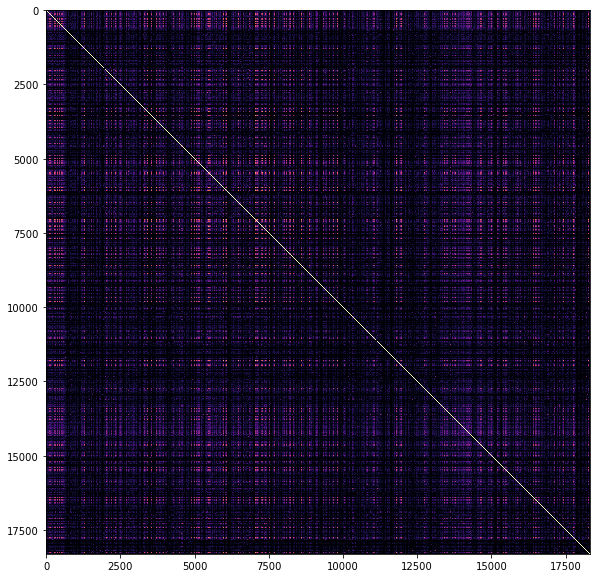

In [102]:
import matplotlib.pyplot as plt

plt.imshow(cosine_sim, cmap='magma', interpolation='nearest')
plt.show()

In [69]:
indices= pd.Series(df_cd.index,index=df_cd["show_name"]) #creating a pandas series for show names

In [71]:
indices

show_name
                                                               0
  The Grier Podcast                                            1
 "ACIM" A Course In Miracles For The Millennium                2
 AfroLatina_BeautifitlyBalanced™️                              3
 Apostles of Tomorrow                                          4
                                                           ...  
Our Future                                                 18305
Bhaskar Bose (Hindi Thriller Podcast)                      18306
Always Cheating: A Fantasy Premier League Podcast (FPL)    18307
Fantasy Weekly FPL Podcast                                 18308
Manchester Is Red                                          18309
Length: 18310, dtype: int64

In [111]:
def recommend_using_cosine(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[title] #finding the row in cosine sim matrix using index value
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)  
    top_5_indices = list(score_series.iloc[1:4].index)  #Getting top 3 similar shows
    
    for i in top_5_indices:  
        recommended_movies.append(list(df_cd['show_name'])[i])
        
    return recommended_movies

In [73]:
recommend_using_cosine("Rajat chauhan | Comedian | Standup") #Checking the recommendation

Companion Comedy
LOL Comedy Showcase: Stand UP Comedy
Indian Comedy Podcast with Sahil Horane


['Companion Comedy',
 'LOL Comedy Showcase: Stand UP Comedy',
 'Indian Comedy Podcast with Sahil Horane']

In [74]:
from collections import Counter

In [80]:
n=Counter()
for i in df_cd["show_name"]:
    n[i]+=1

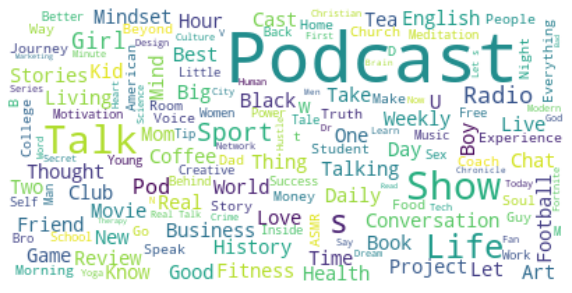

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text=" "
for i in n.keys():
    text+=" "+i
    
        
    
wordcloud = WordCloud(max_font_size=50, max_words=150, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams["figure.figsize"] = (10,10)
wordcloud.to_file("first_review.png")
plt.show()
# Creating word cloud suing show names

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv= TfidfVectorizer(min_df=3,max_features=None,
                     strip_accents="unicode",analyzer="word",token_pattern=r'\w{1,}', 
                     ngram_range=(1,3),
                     stop_words="english") #Intialising the TF-IDF Vectorizer

In [84]:
df_cd["show_description"]=df_cd["show_description"].fillna("") #filling empty decription with spaces

In [85]:
start_tfv=time.time()
tfv_matrix=tfv.fit_transform(df_cd["show_description"]) #Applying TF-IDF vectorization to Show description column
end_tfv=time.time()
print(end_tfv-start_tfv)

108.00943756103516


In [86]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [92]:
sig=sigmoid_kernel(tfv_matrix,tfv_matrix) #Sigmoid kernel for finding the similarity

In [93]:
sig

array([[0.76159635, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159635, 0.76159416, ..., 0.76159417, 0.76159419,
        0.76159421],
       [0.76159416, 0.76159416, 0.76159635, ..., 0.76159416, 0.76159418,
        0.76159416],
       ...,
       [0.76159416, 0.76159417, 0.76159416, ..., 0.76159635, 0.76159459,
        0.7615943 ],
       [0.76159416, 0.76159419, 0.76159418, ..., 0.76159459, 0.76159635,
        0.76159428],
       [0.76159416, 0.76159421, 0.76159416, ..., 0.7615943 , 0.76159428,
        0.76159635]])

In [94]:
new_sigma=sig-0.76159

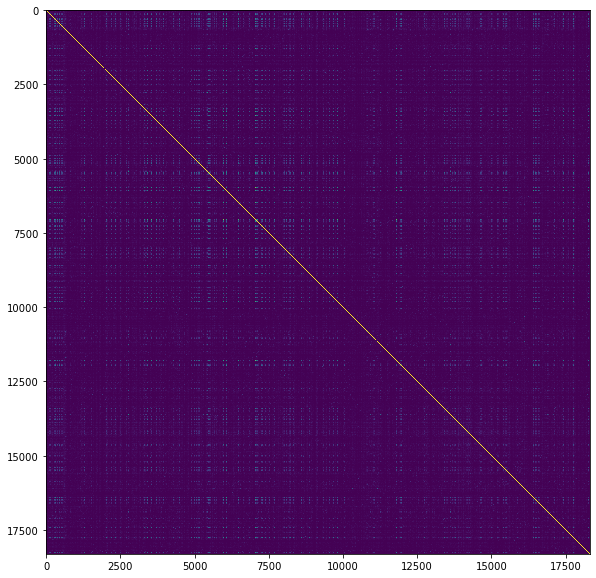

In [95]:
import matplotlib.pyplot as plt

plt.imshow(new_sigma, cmap='viridis', interpolation='nearest')
plt.show()

In [107]:
def get_rec_tfidf(show_name,sig=sig):
    recommended_movies=[]
    idx=indices[show_name]
    sig_scores=list(enumerate(sig[idx]))
    sig_scores=sorted(sig_scores,key=lambda x:x[1],reverse=True)
    sig_scores=sig_scores[1:4]
    show_indices=[i[0] for i in sig_scores] #Getting top 3 indices
    for i in show_indices:  
        recommended_movies.append(list(df_cd['show_name'])[i])
    return recommended_movies 
    

In [108]:
get_rec_tfidf("Rajat chauhan | Comedian | Standup")

['Companion Comedy',
 'LOL Comedy Showcase: Stand UP Comedy',
 'Indian Comedy Podcast with Sahil Horane']

In [99]:
get_rec_tfidf("twitter_trends")

15734            The Ultimate Halo Show
5511                       Halo Respawn
10837    SacredIconHalo: A Halo Podcast
Name: show_name, dtype: object

In [100]:
recommend_using_cosine("twitter_trends")

Column Podcast
Brotherly Pod
Lair of the Clockwork Pod


['Column Podcast', 'Brotherly Pod', 'Lair of the Clockwork Pod']

In [116]:
first_recommendations=[]
second_recommendations=[]
for i in df_saved_shows["show_name"]:
    first_recommendations.append(recommend_using_cosine(i))
    second_recommendations.append(get_rec_tfidf(i))
first_recommendations.append(recommend_using_cosine("twitter_trends"))
second_recommendations.append(get_rec_tfidf("twitter_trends"))

In [117]:
first_recommendations

[['Towards Data Science',
  'Data Futurology - Leadership And Strategy In Artificial Intelligence, Machine Learning, Data Science',
  'Data Learners'],
 ['Lunker Dogs Reel Guy show',
  'Khel Crime Ka (Hindi Crime Podcast)',
  'Always Cheating: A Fantasy Premier League Podcast (FPL)'],
 ['Times news briefing',
  "Luke's ENGLISH Podcast - Learn British English with Luke Thompson",
  'Adulting'],
 ['talkSPORT Hit',
  "Luke's ENGLISH Podcast - Learn British English with Luke Thompson",
  'Twofivesix: Gaming and Marketing'],
 ['Bhaskar Bose (Hindi Thriller Podcast)',
  'NETMAN MOTIVATES WHILE HIDING HIS FACE',
  'Khel Crime Ka (Hindi Crime Podcast)'],
 ['Khel Crime Ka (Hindi Crime Podcast)',
  'Stars se Baatein with Salil',
  'Lunker Dogs Reel Guy show'],
 ['Times news briefing', 'talkSPORT Hit', 'More Than English Podcast'],
 ['Companion Comedy',
  'LOL Comedy Showcase: Stand UP Comedy',
  'Indian Comedy Podcast with Sahil Horane'],
 ['Stars se Baatein with Salil',
  'Khel Crime Ka (Hindi 

In [118]:
second_recommendations

[['Towards Data Science',
  'Data Futurology - Leadership And Strategy In Artificial Intelligence, Machine Learning, Data Science',
  'Data Learners'],
 ['Lunker Dogs Reel Guy show', 'The Cyclone Scoop', 'The Besties'],
 ['Times news briefing',
  "Luke's ENGLISH Podcast - Learn British English with Luke Thompson",
  'Adulting'],
 ['talkSPORT Hit',
  "Luke's ENGLISH Podcast - Learn British English with Luke Thompson",
  'Adulting'],
 ['Bhaskar Bose (Hindi Thriller Podcast)',
  'Khel Crime Ka (Hindi Crime Podcast)',
  'Stars se Baatein with Salil'],
 ['Stars se Baatein with Salil',
  'Khel Crime Ka (Hindi Crime Podcast)',
  'The Ranveer Show'],
 ['talkSPORT Hit', 'Times news briefing', 'Adulting'],
 ['Companion Comedy',
  'LOL Comedy Showcase: Stand UP Comedy',
  'Indian Comedy Podcast with Sahil Horane'],
 ['Stars se Baatein with Salil',
  'Khel Crime Ka (Hindi Crime Podcast)',
  'The Big Shots- Dosa King'],
 ['Khel Crime Ka (Hindi Crime Podcast)',
  'The Ranveer Show',
  'The Big Shots

In [123]:
saved_shows=list(df_saved_shows["show_name"])
improved_first_recommendations=[]
for i in first_recommendations:
    for j in i:
        if j not in saved_shows:
            improved_first_recommendations.append(j)

            

In [124]:
improved_first_recommendations

['Towards Data Science',
 'Data Futurology - Leadership And Strategy In Artificial Intelligence, Machine Learning, Data Science',
 'Data Learners',
 'Lunker Dogs Reel Guy show',
 'Adulting',
 'Twofivesix: Gaming and Marketing',
 'NETMAN MOTIVATES WHILE HIDING HIS FACE',
 'Lunker Dogs Reel Guy show',
 'More Than English Podcast',
 'Companion Comedy',
 'LOL Comedy Showcase: Stand UP Comedy',
 'Indian Comedy Podcast with Sahil Horane',
 'Lunker Dogs Reel Guy show',
 'Lunker Dogs Reel Guy show',
 'Lunker Dogs Reel Guy show',
 'Pokemon detective Pikachu review ',
 'BONK iT!',
 'Podcast of Veto: A Big Brother Podcast',
 'Under Cover',
 'Future Millionaires',
 'The Real Reel Podcast',
 'Flagrant 2',
 'Lunker Dogs Reel Guy show',
 'The Long Ball Podcast',
 'Sharks, Dinosaurs and Mythical Creatures',
 'Learn English podcast',
 'Premier League Preview Podcast',
 'One-Touch Podcast',
 'Column Podcast',
 'Brotherly Pod',
 'Lair of the Clockwork Pod']

In [125]:
improved_second_recommendations=[]
for i in second_recommendations:
    for j in i:
        if j not in saved_shows:
            improved_second_recommendations.append(j)

In [127]:
improved_second_recommendations

['Towards Data Science',
 'Data Futurology - Leadership And Strategy In Artificial Intelligence, Machine Learning, Data Science',
 'Data Learners',
 'Lunker Dogs Reel Guy show',
 'The Cyclone Scoop',
 'The Besties',
 'Adulting',
 'Adulting',
 'Adulting',
 'Companion Comedy',
 'LOL Comedy Showcase: Stand UP Comedy',
 'Indian Comedy Podcast with Sahil Horane',
 'FPL Chieftain',
 'Fantasy Football Fanatics FPL Podcast',
 'Pretty Big Deal with Ashley Graham',
 'Back to India',
 '"Bryan Gets His Life Together" ',
 'Tiktok Questions With Olivia',
 'Hustleshare',
 'TikTok Podcast',
 'UK Fantasy Football Show',
 'Fantasy Football Fanatics FPL Podcast',
 'The Dugout Podcast',
 'Whole Lot of Red Podcast',
 'The Ultimate Halo Show',
 'Halo Respawn',
 'SacredIconHalo: A Halo Podcast']

In [135]:
improved_first_recommendations =list(set(improved_first_recommendations))
improved_second_recommendations = list(set(improved_second_recommendations))

In [140]:
len(improved_first_recommendations)

26

In [138]:
improved_first_recommendations #final recommendation using Count vectorizer and Cosine similarity

['Future Millionaires',
 'One-Touch Podcast',
 'LOL Comedy Showcase: Stand UP Comedy',
 'Flagrant 2',
 'Data Learners',
 'Lunker Dogs Reel Guy show',
 'The Long Ball Podcast',
 'Premier League Preview Podcast',
 'Twofivesix: Gaming and Marketing',
 'BONK iT!',
 'Indian Comedy Podcast with Sahil Horane',
 'Towards Data Science',
 'NETMAN MOTIVATES WHILE HIDING HIS FACE',
 'Podcast of Veto: A Big Brother Podcast',
 'Pokemon detective Pikachu review ',
 'Learn English podcast',
 'The Real Reel Podcast',
 'Brotherly Pod',
 'Companion Comedy',
 'Under Cover',
 'Sharks, Dinosaurs and Mythical Creatures',
 'Column Podcast',
 'Adulting',
 'More Than English Podcast',
 'Data Futurology - Leadership And Strategy In Artificial Intelligence, Machine Learning, Data Science',
 'Lair of the Clockwork Pod']

In [141]:
len(improved_second_recommendations)

24

In [139]:
improved_second_recommendations #final Recommendations using TF-IDF and Sigmoid kernel

['The Besties',
 'The Ultimate Halo Show',
 'LOL Comedy Showcase: Stand UP Comedy',
 'FPL Chieftain',
 'TikTok Podcast',
 'Data Learners',
 'Lunker Dogs Reel Guy show',
 'The Dugout Podcast',
 'Indian Comedy Podcast with Sahil Horane',
 'Fantasy Football Fanatics FPL Podcast',
 'Towards Data Science',
 'Hustleshare',
 'Whole Lot of Red Podcast',
 'SacredIconHalo: A Halo Podcast',
 'Companion Comedy',
 'Back to India',
 '"Bryan Gets His Life Together" ',
 'Adulting',
 'The Cyclone Scoop',
 'Tiktok Questions With Olivia',
 'Pretty Big Deal with Ashley Graham',
 'Halo Respawn',
 'Data Futurology - Leadership And Strategy In Artificial Intelligence, Machine Learning, Data Science',
 'UK Fantasy Football Show']